exploring data to diagnose issues such as outliers, missing values, and duplicate rows.

In [46]:
import pandas as pd
#read csv file
df = pd.read_csv('dob_job_application_filings_subset.csv')

print(df.head())

print(df.tail())

#view number of rows and columns
print(df.shape)

#view the columns of the dataframe
print(df.columns)



       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

/Users/joycemungai/py3learn_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
#more information about the dataframe
df.info

<bound method DataFrame.info of            Job #  Doc #        Borough       House #  \
0      121577873      2      MANHATTAN  386            
1      520129502      1  STATEN ISLAND  107            
2      121601560      1      MANHATTAN  63             
3      121601203      1      MANHATTAN  48             
4      121601338      1      MANHATTAN  45             
...          ...    ...            ...           ...   
12841  520143988      1  STATEN ISLAND  8              
12842  121613833      1      MANHATTAN  724            
12843  121681260      1      MANHATTAN  350            
12844  320771704      1       BROOKLYN  499            
12845  520143951      1  STATEN ISLAND  1755           

                            Street Name  Block  Lot    Bin # Job Type  \
0      PARK AVENUE SOUTH                   857   38  1016890       A2   
1      KNOX PLACE                          342    1  5161350       A3   
2      WEST 131 STREET                    1729    9  1053831       A2   
3  

In [48]:
#frequency counts

print('#Borough')
print(df['Borough'].value_counts(dropna=False))
 
print('#State' )
print(df['State'].value_counts(dropna=False))

print('#Site Fill' )
print(df['Site Fill'].value_counts(dropna=False))

#Borough
MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
#State
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
MD        7
DC        7
KS        6
MA        6
GA        6
VA        5
CO        4
WI        3
AZ        3
MN        3
SC        3
NC        2
UT        2
RI        2
NM        1
IN        1
WA        1
MI        1
VT        1
Name: State, dtype: int64
#Site Fill
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


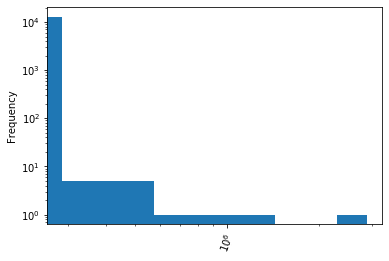

In [49]:
import matplotlib.pyplot as plt

#describe column
print(df['Existing Zoning Sqft'].describe())

#plot a histogram. use log scale since the difference between the min and max is extremely large
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy= True)

plt.show()

Reshaping and tyding data using melting and pivoting technique


In [50]:
##melting data- useful for analysis
airquality = pd.read_csv('airquality.csv')

print(airquality.head())

airquality_melt = pd.melt(airquality, id_vars=['Month','Day' ], var_name='measurement', value_name='reading')

print(airquality_melt.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


In [51]:
#pivoting data - useful for reporting

airquality_pivot = airquality_melt.pivot_table(index = ['Month','Day'], columns = 'measurement', values = 'reading')

print(airquality_pivot.head())

print(airquality_pivot.index)

#resetting data to its original form
airquality_pivot_reset = airquality_pivot.reset_index()

print(airquality_pivot_reset.index)

print(airquality_pivot_reset.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3
MultiIndex([(5,  1),
            (5,  2),
            (5,  3),
            (5,  4),
            (5,  5),
            (5,  6),
            (5,  7),
            (5,  8),
            (5,  9),
            (5, 10),
            ...
            (9, 21),
            (9, 22),
            (9, 23),
            (9, 24),
            (9, 25),
            (9, 26),
            (9, 27),
            (9, 28),
            (9, 29),
            (9, 30)],
           names=['Month', 'Day'], length=153)
RangeIndex(start=0, stop=153, step=1)
measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  7

Splitting columns with str

In [52]:
tb = pd.read_csv('tb.csv')

print(tb.head())

#melt tb dataframe

tb_melt = pd.melt(tb, id_vars=['country', 'year'])

tb_melt['gender'] = tb_melt.variable.str[0]

tb_melt['age_group'] = tb_melt.variable.str[1:]

print(tb_melt.head())

  country  year  m014  m1524  m2534  m3544  m4554  m5564   m65  mu  f014  \
0      AD  2000   0.0    0.0    1.0    0.0    0.0    0.0   0.0 NaN   NaN   
1      AE  2000   2.0    4.0    4.0    6.0    5.0   12.0  10.0 NaN   3.0   
2      AF  2000  52.0  228.0  183.0  149.0  129.0   94.0  80.0 NaN  93.0   
3      AG  2000   0.0    0.0    0.0    0.0    0.0    0.0   1.0 NaN   1.0   
4      AL  2000   2.0   19.0   21.0   14.0   24.0   19.0  16.0 NaN   3.0   

   f1524  f2534  f3544  f4554  f5564   f65  fu  
0    NaN    NaN    NaN    NaN    NaN   NaN NaN  
1   16.0    1.0    3.0    0.0    0.0   4.0 NaN  
2  414.0  565.0  339.0  205.0   99.0  36.0 NaN  
3    1.0    1.0    0.0    0.0    0.0   0.0 NaN  
4   11.0   10.0    8.0    8.0    5.0  11.0 NaN  
  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4   

In [53]:
##using .split and .get
ebola = pd.read_csv('ebola.csv')

print(ebola.head())

ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

ebola_melt['type'] = ebola_melt.str_split.str.get(0)

ebola_melt['country'] = ebola_melt.str_split.str.get(1)

print(ebola_melt.head())



         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

Converting data type


In [55]:
tips = pd.read_csv('tips.csv')

print(tips.head())

print(tips.info())

tips.sex = tips.sex.astype('category')

tips.smoker = tips.smoker.astype('category')

print(tips.info())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 n

In [57]:
#recoding gender- convert to binary form
from numpy import NaN

def recode_gender(gender):
    if gender == 'Female':
        return 0
    elif gender == 'Male':
        return 1
    else:
        return np.nan

tips['recoded_gender'] = tips.sex.apply(recode_gender)  

print(tips.head())

   total_bill   tip     sex smoker  day    time  size recoded_gender
0       16.99  1.01  Female     No  Sun  Dinner     2              0
1       10.34  1.66    Male     No  Sun  Dinner     3              1
2       21.01  3.50    Male     No  Sun  Dinner     3              1
3       23.68  3.31    Male     No  Sun  Dinner     2              1
4       24.59  3.61  Female     No  Sun  Dinner     4              0


In [62]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'recoded_gender'],
      dtype='object')

In [64]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill        244 non-null float64
tip               244 non-null float64
sex               244 non-null category
smoker            244 non-null category
day               244 non-null object
time              244 non-null object
size              244 non-null int64
recoded_gender    244 non-null category
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 10.7+ KB


CASE STUDY: Putting data cleaning all together 

In [72]:
#Load csv data
g1800s = pd.read_csv('gapminder.csv')

#exploring the data
print(g1800s.head())


   Unnamed: 0   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0           0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1           1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13   
2           2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4           4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

   ...  2008  2009  2010  2011  2012  2013  2014  2015  2016  \
0  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

         Life expectancy  
0               Abkhazia  
1            Afghanistan  
2  Akrotiri and Dhekelia  
3                Albania  

In [73]:
g1800s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


In [69]:
print(g1800s.describe())

       Unnamed: 0        1800        1801        1802        1803        1804  \
count  780.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean   129.500000   31.486020   31.448905   31.463483   31.377413   31.446318   
std     75.103138    3.763585    3.755739    3.878204    3.901966    3.877156   
min      0.000000   23.390000   23.390000   23.390000   19.600000   23.390000   
25%     64.750000   29.000000   28.950000   28.900000   28.900000   28.950000   
50%    129.500000   31.800000   31.700000   31.600000   31.500000   31.600000   
75%    194.250000   33.900000   33.900000   33.900000   33.800000   33.870000   
max    259.000000   42.850000   40.300000   44.370000   44.840000   42.830000   

             1805        1806        1807        1808  ...        2007  \
count  201.000000  201.000000  201.000000  201.000000  ...  208.000000   
mean    31.562537   31.615970   31.573134   31.376766  ...   70.139712   
std      3.947957    4.039261    3.917339    4.0

In [70]:
print(g1800s.shape)

(780, 219)


In [71]:
print(g1800s.columns)

Index(['Unnamed: 0', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=219)
